About Dataset

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.

Where are cases still high?

Daily global cases fell after a spike in the spring but are now rising again, with the emergence of the BA.4 and BA.5 subvariants of the Omicron variant.

Studies suggest that Omicron - which quickly became dominant in numerous countries - is milder than the Delta variant, but far more contagious. The subvariants are even more contagious.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
covid_world_wide = pd.read_csv('/content/drive/MyDrive/Projects/Covid-WorldWide/covid_worldwide.csv')

In [4]:
df = covid_world_wide.copy()
df.set_index('Serial Number', inplace=True)
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,,,,,,,
1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [5]:
len(df['Country'].unique())

231

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 225
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          195 non-null    object
 1   Total Cases      195 non-null    object
 2   Total Deaths     195 non-null    object
 3   Total Recovered  195 non-null    object
 4   Active Cases     195 non-null    object
 5   Total Test       195 non-null    object
 6   Population       195 non-null    object
dtypes: object(7)
memory usage: 12.2+ KB


In [7]:
def convert_type(df, column):
    new_column = []
    length = len(df[column])
    for i in df.index:
      new_data = int(re.sub(',', '', df[column][i]))
      new_column.append(new_data)
    df[column] = new_column

for column in df.iloc[:, 1:].columns:
  convert_type(df, column)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 225
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          195 non-null    object
 1   Total Cases      195 non-null    int64 
 2   Total Deaths     195 non-null    int64 
 3   Total Recovered  195 non-null    int64 
 4   Active Cases     195 non-null    int64 
 5   Total Test       195 non-null    int64 
 6   Population       195 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 16.3+ KB


In [9]:
df.sort_values(by=['Population'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,India,44682784,530740,44150289,1755,915265788,1406631776
1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
2,Indonesia,6730289,160817,6565208,4264,114158919,279134505
3,Pakistan,1576313,30640,1538689,6984,30570862,229488994
4,Nigeria,266463,3155,259850,3458,5708974,216746934


In [11]:
def apply_func(df, column, func):
  print(f'''Column Name: {column},
        Function Name: {func.__name__},
        {df[df[column] == func(df[column])]}''')

apply_func(df, 'Total Cases', max)
apply_func(df, 'Total Cases', min)

Column Name: Total Cases,
        Function Name: max,
          Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
1     USA    104196861       1132935        101322779       1741147   

   Total Test  Population  
1  1159832679   334805269  
Column Name: Total Cases,
        Function Name: min,
                Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
194  Montserrat         1403             8             1376            19   

     Total Test  Population  
194       17762        4965  


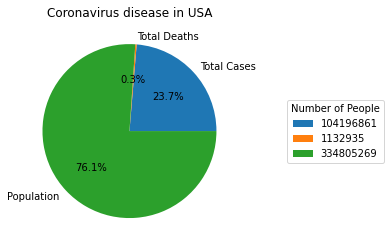

In [12]:
def pie_chart(country, columns: list):
  labels = df.loc[df['Country'] == country, columns].columns
  values = df.loc[df['Country'] == country, columns].values.flatten()
  plt.pie(x = values, labels = labels, autopct='%1.1f%%');
  plt.legend(values,
             title='Number of People',
             loc="center left",
             bbox_to_anchor=(1.2, 0, 0.5, 1))
  plt.title(f'Coronavirus disease in {country}')

pie_chart('USA', ['Total Cases', 'Total Deaths', 'Population'])

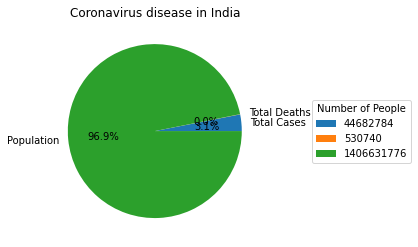

In [13]:
pie_chart('India', ['Total Cases', 'Total Deaths', 'Population'])